# MTH5001 Introduction to Computer Programming - Lab 3
Dr Lucas Lacasa and Prof. Thomas Prellberg

## Exercises

Note that ***Reading and Understanding the Instructions*** is part of doing your work. This is always true, but especially in this coursework there are places where you will invariably get lost if you don't follow this strategy.

### Exercise 1: Nested lists

If we remove the `sum()` in the code of Exercise 2, we don't compute the sum of list entries, and the output is a list whose entries are themselves lists. 

In [9]:
print([sum([k for k in range(n)]) for n in range(5)]) # 1st 0 is for "sum of []", 2nd 0 is for "sum of [0]"
print([    [k for k in range(n)]  for n in range(5)]) # i.e. for n in 0,1,2,3,4
print([k for k in range(4)])
print(list(range(0))); print(list(range(1))) # range 0 means values 0 to 0 exclusive, i.e. nothing!

[0, 0, 1, 3, 6]
[[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3]]
[0, 1, 2, 3]
[]
[0]


**Make sure you really understand the above code** (for example, why in the second print statement the first list entry is given by `[]`). 

It might help to pull the code apart a bit more. The code `[3*k*(k+1)+1 for k in range(n)]` gets computed five times, for values of $n$ from $0$ to 4:

In [71]:
print( [k for k in range(0)] )
print([k for k in range(1)])
print([k for k in range(2)])
print([k for k in range(3)])
print([k**2 for k in range(4)])

[]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 4, 9]


The five results of these computations then get put into a list, producing the output given above.

Once you you understand what is going on here, you can now test your understanding by trying to create the following three lists of lists using list comprehension.

#### Exercise 1.a: Using list comprehension, create 
$$[[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36], [7, 49]]\;,$$ 
$$[[0], [0, 1], [0,1,2], [0,1,2,3], [0,1,2,3,4]]\;,$$
$$[[1], [1, 2], [1,2,3], [1,2,3,4], [1,2,3,4,5], [1,2,3,4,5,6]]\;.$$

**Hint:** if you don't immediately see the patterns, try first using pen and paper to write down some ideas and test them.

In [23]:
print([[n, n**2] for n in range(0,8)])
print([[k for k in range(0,n)] for n in range(1,6)])
print([[k for k in range(1,n)] for n in range(2,8)])

[[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36], [7, 49]]
[[0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4]]
[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]


### Exercise 2: The Mertens function

Similar to our discussion of Euler's totient function $\varphi(n)$, we would like you to look at the Mertens function $M(n)$, which is defined as
$$M(n)=\sum_{k=1}^n\mu(k)$$
where $\mu(k)$ is the Möbius function given by
$$\mu(k)=\begin{cases}0&\text{if $k$ has zero or more repeated prime factors}\\1&\text{if $k=1$}\\-1^j&\text{if $k$ is a product of $j$ distinct primes.}\end{cases}$$

We can import the Möbius function from sympy.

### Exercise 2.a: Reproduce the plot of the Mertens function shown below

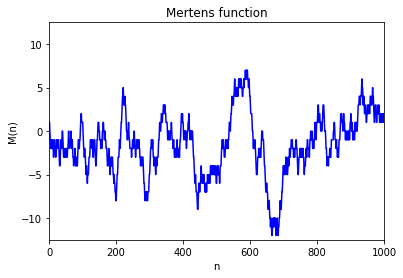

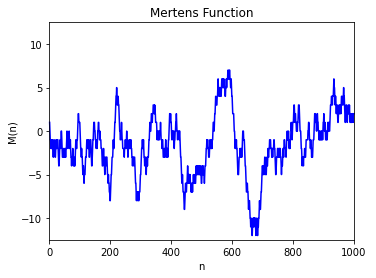

In [55]:
from sympy.ntheory import mobius; import matplotlib.pyplot as plt; import numpy as np
x = [k for k in range(1,1001)] # x = 1, 2, ..., 1000
y = [sum([mobius(k) for k in range(1,n)]) for n in range (2,1002)]

ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_position(('data', 1000))
ax.spines['top'].set_bounds(0, 1000)
ax.spines['bottom'].set_bounds(0, 1000)

plt.ylim([-12.5,12.5])
plt.plot(x, y, color='blue')
plt.xlabel('n'); plt.ylabel('M(n)')
plt.title("Mertens Function"); plt.show()


### Exercise 3: Convergence and Divergence of Infinite Sums

The Taylor series $$\log(1+x)=\sum_{k=1}^\infty\frac{(-1)^{k-1}}kx^k$$ converges for $-1<x<1$. The question of convergence and divergence at $x=1$ and $x=-1$ is subtle.

#### Exercise 3.a: To study numerically the behaviour of the partial sums for $x=1$ and $x=-1$, create plots of the first $1000$ partial sums $$\sum_{k=1}^n\frac{(-1)^{k-1}}k\quad\text{and}\quad\sum_{k=1}^n\frac1k$$ versus $\log(n)$.

Remember that in order to plot points, you need to create a list of $x$-coordinates and a list of $y$-coordinates of the points you want to plot. Here the $x$-coordinates are given by $\log(n)$ and the $y$-coordinates by the partial sums of the first $n$ terms.

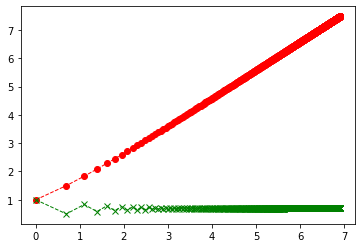

In [11]:
import matplotlib.pyplot as plt; import numpy as np

logx = [np.log(x) for x in range(1,1000)]
y1 = [sum([1/k for k in range(1,n+1)]) for n in range(1,1000)]
y2 = [sum([((-1)**(k-1))/k for k in range(1,n+1)]) for n in range(1,1000)]
plt.plot(logn,y1,color='red',ls='dashed',lw='1',marker='o'); 
plt.plot(logn,y2,color='green',ls='dashed',lw='1',marker='x'); 
plt.show()

#### Exercise 3.b: What do the plots suggest about the convergence of the infinite sums for $x=1$ and $x=-1$?

It seems that the infinite sum diverges for x=-1 and converges for x=1.

### Exercise 4: More on the Riemann Zeta Function

This is a continuation of last week's exercise, to do more numerical computations using our improved knowledge of Python. Recall the two expressions of the Riemann Zeta function 
$$\zeta(s)=\sum_{n=1}^\infty\frac1{n^s}\;.$$
$\zeta(s)$ also can be expressed as an infinite product over all primes,
$$\zeta(s)=\prod_p\left(\frac1{1-p^{-s}}\right)\;,$$
where the product is over the primes $p=2,3,5,7,11,13,\ldots$. 

Last week you computed a few partial sums and partial products using up to six terms. Using list comprehension, we can simplify the code quite considerably.

#### Exercise 4.a: Compute the $100$th, $200$th and $400$th partial sums for $s=2,3,4$. For $s=2$ and $s=4$, compare against the exactly known values. For $s=3$, an exact value is not known, so we need to use the function `zeta` from the `scipy` module to compare (you used this one last week). How many digits agreement do you find with the $400$th partial sums?

In [27]:
import scipy.special; import numpy as np; zeta = scipy.special.zeta

def zsum(s,k): #s is parameter in zeta unction, k is size of sum
    return print(sum([1/n**s for n in range(1,k+1)]))

for i in range(2,5):
        zsum(i,100); zsum(i,200); zsum(i,400)
        print(zeta(i), "\n");

1.6349839001848923
1.6399465460149971
1.6424371892440628
1.6449340668482264 

1.2020074006596781
1.2020444655033462
1.2020537859623281
1.2020569031595942 

1.0823229053444727
1.082323192355929
1.0823232285223028
1.0823232337111381 



For the product formula we need an easy way of accessing the $n$-th prime. Fortunately, there already exists a prime function in a Python module (you can find stuff like this with Google) which we can access using `from sympy import prime`.

#### Exercise 4.b: Using `prime()`, print a list of the first $20$ prime numbers, and print the $1000$th prime number.

In [29]:
from sympy import prime #no need to import whole library, only a function
print([prime(n) for n in range(1,21)]); print(prime(1000))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]
7919


Similarly to summing up numbers in a list, we can multiply them as well, using 'numpy.prod()' instead of 'sum()'.

#### Exercise 4.c: Compute the $100$th, $200$th and $400$th partial products for $s=2,3,4$., and compare against the known values. How many digits agreement do you find with the $400$th partial products?

You will notice that your code takes considerably more time to execute, due to the need to repeatedly use multiplication, division, powers, and calling `prime()`. 

In [33]:
import numpy as np; from sympy import prime; from scipy.special import zeta as zeta

def zprod(s,k): # compute partial products of size k, parameter s
    return print(1/np.prod([1-prime(n)**(-s) for n in range(1,k+1)]))

for i in range(2,5):
    zprod(i,100)
    zprod(i,200)
    zprod(i,400)
    
print(zeta(1))

1.6445152217242938
1.6447685061588646
1.6448670841678619
1.2020566021795087
1.202056851117265
1.2020568938437033
1.0823232333691954
1.0823232336851456
1.0823232337090736
inf


## Submit your Jupyter Notebook to QMPLUS

Once you are done, save the jupyter notebook and submit it to QMPLUS under Lab Report Week 3.